In [ ]:
#3.2.Activate Funtion
#3.2.2.계단 함수 구현하기
def step_funtion(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
#배열도 인수로 넣기
def step_funtion(x):
  y = x > 0
  return y.astype(np.int)

In [ ]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
y = y.astype(np.int) # bool -> int
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


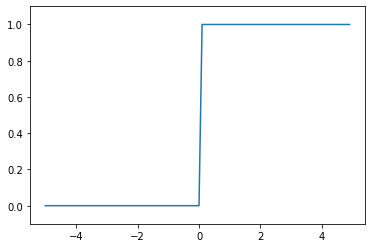

In [ ]:
#3.2.3.계단 함수의 그래프
import matplotlib.pylab as plt

def step_fuction(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1) #0.1 간격으로 넘파이 배열 생성
y = step_funtion(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축 범위지정
plt.show()

In [ ]:
#3.2.4.시그모이드 함수 구현하기
def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x) #thanks to broadcast

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


<function matplotlib.pyplot.show>

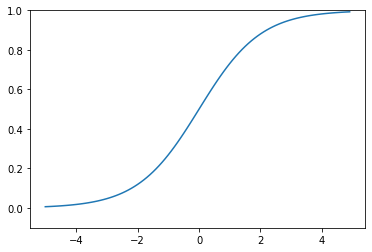

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1,1) # y축 범위 지정
plt.show

In [ ]:
#3.2.7.ReLU 함수
def relu(x):
  return np.maximum(0,x) # maximum, 두 입력 중 큰 값을 선택해서 반환

In [ ]:
#3.3.1.다차원 배열
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape) # 튜플임에 주의!
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [ ]:
#2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


In [ ]:
#3.3.2.행렬의 곱
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,4], [7,8]])
print(B.shape)
print(np.dot(A,B))

(2, 2)
(2, 2)
[[19 20]
 [43 44]]


In [ ]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)
print(np.dot(A,B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [ ]:
C = np.array([[1,2],[3,4]])
print(C.shape)
print(A.shape)
# print(np.dot(A,C)) Compile Error!

(2, 2)
(2, 3)


ValueError: ignored

In [ ]:
A = np.array([[1,2], [3,4], [5,6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


In [ ]:
#3.3.3.신경망에서의 행렬 곱
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


In [ ]:
#3.4.3층 신경망 구현하기
#3.4.2.각 층의 신호 전달하기
#0층에서 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [ ]:
#1층에서 2층
Z1 = sigmoid(A1) # for now, Z1 is new X

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
# 2층에서 출력층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3 + B3)
Y = identity_function(A3) # or Y = A3, 활성화 함수로 항등함수를 사용

In [ ]:
#3.4.3.구현 정리
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [2]:
#3.5.출력층 설계하기
#3.5.1.항등함수와 소프트맥스 함수 구현하기
#소프트맥스
import numpy as np
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [7]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [8]:
#3.5.2.소프트맥스 함수 구현 시 주의점

a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))
c = np.max(a)
print(a-c)
print(np.exp(a-c) / np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [11]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c) # overflow 대체
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [12]:
#3.5.3.소프트맥스 함수의 특징
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


In [17]:
#3.6.손글씨 숫자 인식
#3.6.1.MNIST Data Set
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

ModuleNotFoundError: ignored